In [1]:
### importing QComp ###
include("../src/QComp.jl")
using .QComp

using Yao
using YaoPlots
using Plots
default(lw=2, ms=5, palette=:Set2_8)
using LinearAlgebra
using Random

In [2]:
#Example use (random states vs uniform state)

seed = 1234 # set seed for reproducibility
Random.seed!(seed)

n = 4 # preferably a power of 2

n_samples = 10
states1 = [rand_state(n) for i=1:n_samples*2]
states2 = [uniform_state(n) for i=1:n_samples*2]

# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], 10), repeat([-1], 10)]...)

# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], 10), repeat([-1], 10)]...)

# structures
d1 = Data(tr_states, tr_labels);
d2 = Data(te_states, te_labels);

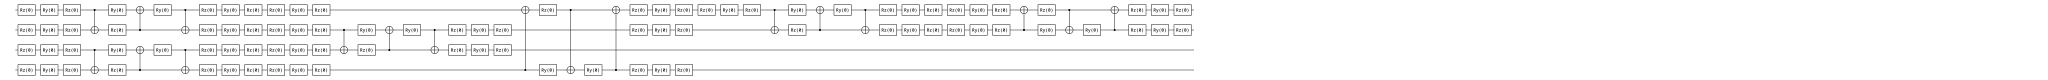

In [3]:
iters = 300
# Using ADAM optimiser in source code.
# See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.
lr = 0.05  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
sig = true
ansatz = conv_SU4 # conv_Ry, conv_Ry2, conv_SU4

circ = build_QCNN(n, ansatz=ansatz)
# p = GenericParams(n=n, circ=circ)
p = InvariantParams(n=n, circ=circ, ansatz=ansatz)
initialize_params(p);

YaoPlots.plot(circ)

In [4]:
params, loss_track, tr_track, te_track, tr_preds, te_preds = train_test_model(d1, d2, p, iters, sig, lr; output=false)

Initial: loss = 0.581344279862375,tr_acc = 0.8, te_acc = 0.85
Final: loss = 0.0006148464044150679,tr_acc = 1.0, te_acc = 0.75


([2.1894101744006096, 0.9811399031473556, 1.901847551781706, 3.6531567196825168, 6.2306634499864915, 1.1871813135557263, 2.155099221862162, 3.3746009482791655, 1.7734898518179694, 1.8428051349913397  …  2.1443874769381215, 5.110725466290319, 4.502828498207429, 4.2577642076335165, 5.426219796954745, 3.6944284254573043, 3.8740298997697207, 0.47413823078075745, 2.438731821771221, 3.24782783904518], [0.581344279862375, 0.4072643085766048, 0.29218773736646825, 0.18746809490942706, 0.150184881458989, 0.11895833613245069, 0.0851384072003316, 0.06092806081798759, 0.05234287136999023, 0.05535457582660228  …  0.0006276758991214772, 0.0006262126210823181, 0.0006247589805189408, 0.000623314893291596, 0.0006218802762806852, 0.000620455047368372, 0.00061903912542065, 0.0006176324302695866, 0.0006162348826964973, 0.0006148464044150679], [0.8, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.85, 0.8, 0.75, 0.75, 0.7, 0.8, 0.8, 0.8, 0.85, 0.85  … 

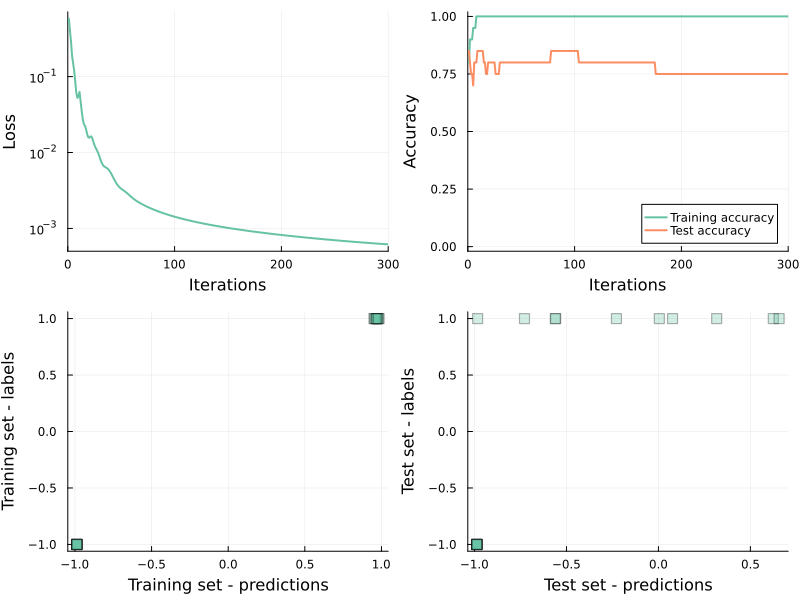

In [5]:
# Loss vs Interations
p1 = Plots.plot(xlim=(0, iters), xlabel="Iterations", ylabel="Loss")
Plots.plot!(loss_track, yaxis=:log, label=false)

# Accuracy vs Interations
p2 = Plots.plot(xlim=(-0.05, iters), ylim=(-0.02, 1.02), xlabel="Iterations", ylabel="Accuracy", legend=:bottomright)
Plots.plot!(tr_track, label="Training accuracy")
Plots.plot!(te_track, label="Test accuracy")

# Training labels vs predictions
p3 = Plots.scatter(xlabel="Training set - predictions", ylabel="Training set - labels", legend=false)
Plots.scatter!(tr_preds, tr_labels, ma=0.3, shape=:rect)

# Test labels vs predictions
p4 = Plots.scatter(xlabel="Test set - predictions", ylabel="Test set - labels", legend=false)
Plots.scatter!(te_preds, te_labels, ma=0.3, shape=:rect)

Plots.plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))